<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/100px-NumPy_logo.svg.png" align="right"> </img>
# The numpy.random package 


The numpy.random package allows us to efficiently generate whole arrays of sample values from many kinds of probability distributions. The use of randomness is important in the field of machine learning as well as Data science as a whole. In computing, random numbers are not usually truly random and are instead programmatically generated to look random. For this reason, we refer to these numbers as *psuedo random*, as any numbers generated this way can ultimately be predicted. Despite this, unless you have security concerns the numpy.random package is a handy tool for generating data. 

<br>

## Simple Random Data
***


Before we can investigate the various functions of the package, we must first import the relevant libraries we will be using as well as construct a new generator.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Contructs generator 'rng'
rng = np.random.default_rng()

#### Integers 



This method returns an array of 20 random integers from a *low* value, in this case 1, to a high value 6. The values returned exclude the high value given as can be observed below with the exclusion on any 6 integers in the array. 

In [2]:
rng.integers(1,6, size=20)

array([1, 3, 3, 5, 4, 1, 2, 4, 2, 2, 1, 5, 1, 2, 5, 2, 2, 4, 3, 4],
      dtype=int64)

This method also contains a parameter *endpoint*, which is set to False by default. When set to True, the *high* values are also included in outputs. The *dtype* seen above refers to the Data type and are by default 64-bit integers. It is worth noting that if *high* is not set, the *low* parameter is set to 0 and the initial value of *low* is used as *high*.

In [3]:
rng.integers(10, size=40, endpoint=True)

array([ 0,  5,  4,  7,  8,  3,  3,  5,  0,  1, 10,  7,  7,  4,  1,  2, 10,
        0,  1,  1,  8,  5,  8,  2,  8,  5,  0,  4,  6,  8,  4,  9, 10,  5,
        5,  7,  3,  8,  8,  6], dtype=int64)

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers
***

#### Random

This function returns float values between 0.0 and 1.0. dtype can also be set but only 64 and 32-bit float values are supported.

In [4]:
rng.random(size=10)

array([0.69681446, 0.97056794, 0.63098313, 0.70652444, 0.88886688,
       0.07727787, 0.66442079, 0.60753045, 0.15774024, 0.62018247])

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random
***

#### Choice

rng.choice, when given a value *a* (in this case 5) and a *size* acts similarly to rng.integers and will return an array of integers in the range from 0 to 5 (exclusive) of size *size*.

In [5]:
rng.choice(5, size=5)

array([0, 2, 4, 2, 0], dtype=int64)

rng.choice can also take a parameter *p*, which is an array specifying the probability associated with getting each of the values from *a*. If *p* is not specified, the sample returned takes on a uniform distribution. 

In [6]:
rng.choice(5, size=10, p=[0.1, 0.6, 0.1, 0.1, 0.1])

array([2, 4, 1, 2, 4, 1, 3, 4, 1, 3], dtype=int64)

Below is a visualisation of rng.choice, demonstrating the uniform and non uniform distributions that can be returned, depending on the presence of the *p* parameter. 10,000 values are returned between 0-10(exclusive). More on this later.

(array([1013., 1067.,  977., 1056.,  957.,  967.,  993.,  945., 1011.,
        1014.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

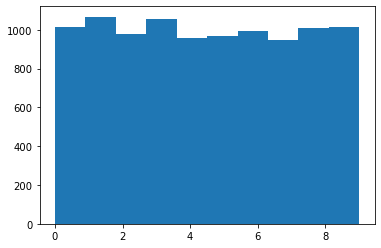

In [7]:
#Plotting rng.choice with p=None(default) 
ch = rng.choice(10, size=10000)
plt.hist(ch)

(array([1023.,   95., 1967.,    0.,  497.,  524.,  485.,  482.,  988.,
        3939.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

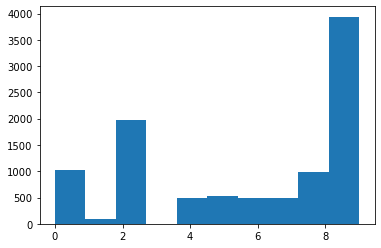

In [8]:
#Plotting rng.choice with an array of different p values, note the correspondance of the values to the historgram below.
ch2 = rng.choice(10, size=10000, p=[0.1, 0.01, 0.2, 0.0, 0.05, 0.05, 0.05, 0.05, 0.1, 0.39])
plt.hist(ch2)

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice
***

<br>

#### Bytes


rng.bytes returns random bytes of a specified size. Useful for cryptographical purposes. 

In [9]:
rng.bytes(100)

b"B\xd7i\xaaf\xfa\xe1dY\x0c\xdb\x7f\x9c\xfe\xe5\xe2\xa8\xd9\xa4k\x1c\xe7\xef-O#\xbb\x15\xd0(=\x04\xd3A\xd0\x9a\xd7\xdd\xc7uE\xb2'=\xe1\xb8\x85\xb3\xc1\xe1\xc9\x8c\x92\t\xb7Sw\xcb\x9b\x11\xeb\x9e\xaa\x8d\x0bfSH\x03J\x86\xf7\xe1h\x95\x1a<\xdc\xef\xa7er\x8e\xd0\xe4\x99Y#\x18B\xf9\x01\xe6\x8a\x19\xfd-\xf1o\t"

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes
***

<br>

## Permutations

***

Permutation functions provide a way of reordering the content and sequences of arrays.

#### Shuffle

This function shuffles the contents of an array without making a copy, the order is changed but the content remains the same.

In [10]:
arr = rng.integers(10, size=10)
arr

array([4, 2, 7, 4, 5, 4, 5, 1, 1, 8], dtype=int64)

In [11]:
rng.shuffle(arr)
arr

array([1, 4, 1, 8, 4, 7, 2, 5, 4, 5], dtype=int64)

rng.shuffle also works on mulit-dimensional arrays.

In [12]:
arr2 = rng.integers(10, size=(3,3))
rng.shuffle(arr2)
arr2

array([[5, 7, 7],
       [1, 7, 3],
       [6, 8, 8]], dtype=int64)

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle
***

#### Permutation

Randomly shuffles a value *x*. In our case *x* is 10, so a permuted array of size 10 in range 0-9 is generated. 

In [13]:
rng.permutation(10)

array([8, 9, 3, 0, 5, 7, 4, 1, 6, 2])

*x* can also be an array, in which case, unlike rng.shuffle, a copy is made and the elements are randomly shuffled within. 

In [14]:
arr3 = rng.integers(10, size=10)
rng.permutation(arr3)

array([3, 5, 2, 1, 8, 4, 0, 0, 2, 8], dtype=int64)

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation
***

<br>

## Distributions

***

Next, we will look at some of NumPy's many functions for returing randomly generated data distributions.

#### Normal

Normal distribution is one of the most commonly observed distributions and can be observed anywhere from thing like food delivery times to test score results. It is more colloquially known as the Bell Curve or academically as the Guassian distribution.[1]

The rng.normal method generates a normal distribution in NumPy. It can take 3 parameters *loc* which is the mean, or where the peak of the bell is placed, *scale* which determines how far in each direction from the mean the elements in the array may stretch and finally *size* which species the quantity of elements in the array, including additional sub-arrays.

In [15]:
#Generates a normal distribution, with a mean of 2 and a stdev of 1 either side.
#Values generated in 2d array with 5 values at each element.
rng.normal(loc=2, scale=1, size=(3,5))

array([[3.50233857, 1.25099019, 2.25879704, 1.67212873, 2.65751061],
       [2.2040457 , 2.97936983, 3.02984595, 1.58557845, 2.5757981 ],
       [1.79266334, 2.50521153, 0.77573677, 0.29402211, 1.255258  ]])

Below is a visualisation of heights in an imagined population, data loosely corresponds to real world values, mean height is 1.7, with a standard deviation of 0.07.

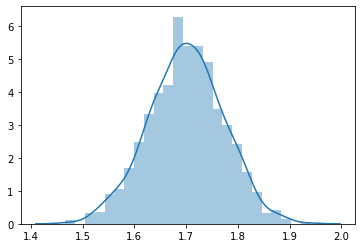

In [26]:
n = rng.normal(1.7, 0.07, 1000) #Generated normal distribution of size 1,000
sns.distplot(n) #Seaborn distplot, sourced from seaborn documentation[2]

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal
***

#### Uniform

Uniform distribution is when any value in a given interval has an equal chance of being returned.

The NumPy uniform method has a lower and upper bound as parameters in the form of *low* and *high* with *high* being excluded from returned values, it also has a *size* parameter for specifying the amount of values to be returned. Below the uniform method is called generating 10 values between 0 and 99. Samples returned are in floating point numbers. 

In [17]:
rng.uniform(0,100,10)

array([26.25377697, 28.64137125, 79.63091379,  6.93821367, 66.61221636,
       96.95879312, 16.65940037, 22.11890903, 70.26691113, 65.60847184])

Although it may not seem like it, each value is in fact equally as likely to be drawn.

(array([5., 4., 6., 1., 7., 6., 4., 5., 5., 7.]),
 array([ 3.29116535, 12.76949114, 22.24781694, 31.72614273, 41.20446853,
        50.68279432, 60.16112012, 69.63944591, 79.11777171, 88.5960975 ,
        98.0744233 ]),
 <a list of 10 Patch objects>)

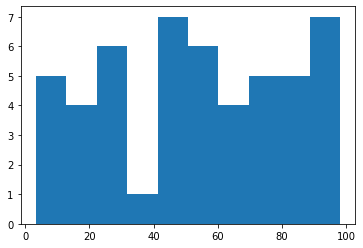

In [18]:
#Histogram plot of unifrom distribution on a size of 10
u = rng.uniform(0,100,size=50)
plt.hist(u)

This becomes apparent when dealing with much larger quantities as shown below.

(array([1026.,  996.,  988., 1013.,  940., 1013.,  964., 1021.,  997.,
        1042.]),
 array([5.08852470e-03, 1.00038177e+01, 2.00025469e+01, 3.00012761e+01,
        4.00000053e+01, 4.99987345e+01, 5.99974637e+01, 6.99961929e+01,
        7.99949221e+01, 8.99936514e+01, 9.99923806e+01]),
 <a list of 10 Patch objects>)

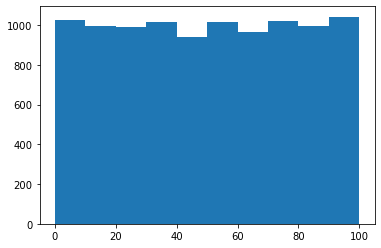

In [19]:
u2 = rng.uniform(0,100,size=10000)
plt.hist(u2)

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform
***

#### Binomial

Binomial Distribution is used to generate values of a binary nature, the most common example of this is data related to a coin toss. Binomial distribution is discrete, as in the case of the coin toss, the coin may on land on heads or tails.[3]

This method has 3 parameters, *n*, the number of trials, *p* the probability of each occurrence and *size*, the output shape of the trials. 

In [20]:
#The results of 5 instances of tossing a coin 10 times, numbers can be observed as out of 10.
rng.binomial(n=10, p=0.5, size=5)

array([3, 4, 4, 6, 3], dtype=int64)

Visualising the results of 1,000 instances of the coin toss example, we can see results are bunched in the 4-6 area with some variance on either side. This is expected of the coin toss scenario, where 5 out of 10 can be perceived as the average.

(array([  8.,  39., 104., 176., 290., 194., 119.,  53.,  16.,   1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

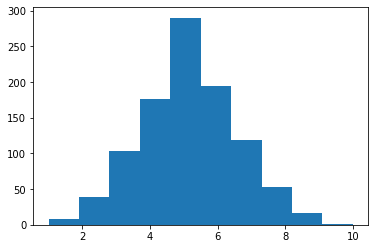

In [21]:
b = rng.binomial(n=10, p=0.5, size=1000)
plt.hist(b)

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial
***

#### Multinomial

Multinomial Distribution is very similar to binomial distribution, the difference is while Binomial involves values of a binary nature, multinomial distribution involves samples that can have multiple different outcomes. The classic example of this is the dice throw experiment.[4]

The multinomial method takes in the following parameters, *n* the number of experiments, in our case let's say we throw a dice 20 times, *n*=20, *pvals* is a list containing the probability of outcomes for the dice roll, and finally *size* is the number of instances of the experiment run.

In [22]:
rng.multinomial(n=20, pvals=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6], size=1)

array([[2, 5, 5, 3, 4, 1]], dtype=int64)

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.multinomial.html#numpy.random.Generator.multinomial
***

#### Zipf Distribution

Zipf distribution is a distribution based on Zipf's law, which observed that in human language the most frequently used work will occur twice as often as the second most used word, and three times as often as the third most used word, and so on. An example of this is the word "the", which occurs twice as much as the next most used word "of" and three times as the next most used word "and".[5]

Zipf distribution takes in two parameters *a*, the distribution paramater and *size*, the quantity of values in the returned array.

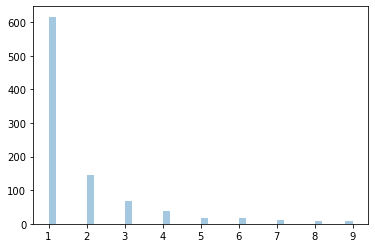

In [23]:
z = rng.zipf(a=2, size=1000)
sns.distplot(z[z<10], kde=False)

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.zipf.html#numpy.random.Generator.zipf
***

<br>

## Seeding
***

NumPy's random numbers are not truly random and are instead programmatically determined by a random number generator. In the latest version of NumPy the random generator relies on something called a BitGenerator to manage program state and produce the random bits that are then used as values. The current BitGenerator used in this process is the Permuted Congruential Generator (PCG64). This generator recently replaced the older Mersenne Twister (MT19937) as it has faster timings across all platforms and is less prone to failing certain statistical tests[6]. The generator generates a sequence of numbers from a source called a seed. The seed can be set to as any integer value, if none is set, a common practice is for the seed to be taken from the current system time in milliseconds.[7] The PCG64 generator sources its randomness from the computers OS.[8]

As mentioned above, the seed is our starting point from which we get our sequence of random numbers. This also means that if we give the same seed, we can expect the same results each time. Below is a demonstration.

In [24]:
#Constructs a new generator 'rng2' with seed=1.
rng2 = np.random.default_rng(seed=1)
rng2.integers(1,10, size=10)

array([5, 5, 7, 9, 1, 2, 8, 9, 3, 3], dtype=int64)

In [25]:
rng3 = np.random.default_rng(seed=1)
rng3.integers(1,10, size=10)

array([5, 5, 7, 9, 1, 2, 8, 9, 3, 3], dtype=int64)

As you can see, two new separate generators were constructed seeded with the value 1. After this two identical instances of the rng.integer method were called which returned the same values in both of the output arrays.

https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator
https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.BitGenerator.html#numpy.random.BitGenerator
***

<br>

# Sources
***

[1]StatisticsByJim, Normal Distribution in Statistics, Jim Frost https://statisticsbyjim.com/basics/normal-distribution/ <br>
[2]Seaborn Documentation, seaborn.distplot https://seaborn.pydata.org/generated/seaborn.distplot.html<br>
[3]w3schools, NumPy Random, Binomial Distribution https://www.w3schools.com/python/numpy_random_binomial.asp<br>
[4]w3schools, NumPy Random, Multinomial Distribution https://www.w3schools.com/python/numpy_random_multinomial.asp<br>
[5]Wikipedia, Zipf's law, https://en.wikipedia.org/wiki/Zipf%27s_law<br>
[6]NumPy Documentation, Random, Performance https://numpy.org/doc/stable/reference/random/performance.html<br>
[7]Machine Learning Mastery, How to Generate Random Numbers in Python, Jason Brownlee https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/<br>
[8]NumPy Documentation, BitGenerators, PCG64 https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64 <br>

***